In [310]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [311]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [312]:
label_names = data['target_names']

In [313]:
labels = data['target']

In [314]:
feature_names = data['feature_names']

In [315]:
features = data['data']

In [316]:
print(label_names)
print(labels.shape)
print(feature_names)
print(features.shape)

['malignant' 'benign']
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


In [317]:
# Visualize the attributes histograms

count=1
fig=plt.figure(figsize=(10, 6), dpi=90)

<Figure size 900x540 with 0 Axes>

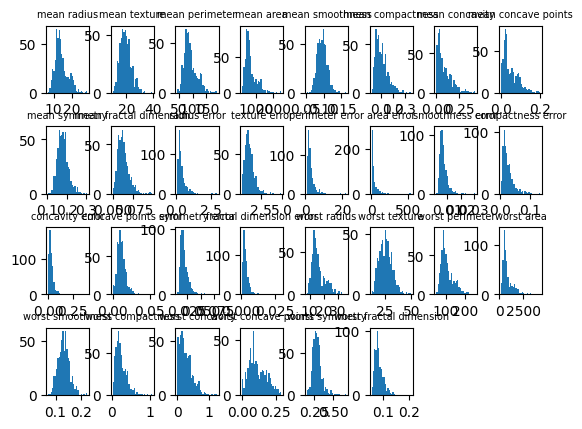

In [318]:
for i in range(features.shape[1]):
    plt.subplot(4,8,count)
    plt.hist(features[:, i], bins=30)
    plt.title(feature_names[i], fontsize=7)
    count+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.tight_layout(pad=0.1)

plt.show()

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.40, random_state = 42)

print('Scikit Split')
#check the resultant sizes
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

Scikit Split
X train (341, 30)
X test (228, 30)
y train (341,)
y test (228,)


In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [321]:
gnbClassifier = GaussianNB()
gnbClassifier.fit(X_train,y_train)
y_pred_gnb = gnbClassifier.predict(X_test)
print(y_pred_gnb.shape)

(228,)


In [322]:
# # スケーラーの初期化
# scaler = StandardScaler()

# # 訓練データを標準化
# X_train_scaled = scaler.fit_transform(X_train)

# # 標準化されたデータで分類器を訓練
# gnbClassifier = GaussianNB()
# gnbClassifier.fit(X_train_scaled, y_train)

# # テストデータも同様にスケーリングを行う
# X_test_scaled = scaler.transform(X_test)

# y_pred_gnb = gnbClassifier.predict(X_test_scaled)
# print(y_pred_gnb.shape)

In [323]:
train_accuracy = gnbClassifier.score(X_train, y_train)

test_accuracy = gnbClassifier.score(X_test, y_test)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.9384164222873901
test accuracy 0.9517543859649122


In [324]:
# train_accuracy = gnbClassifier.score(X_train_scal, y_train)

# test_accuracy = gnbClassifier.score(X_test_scaled, y_test)

# print('train accuracy', train_accuracy)
# print('test accuracy', test_accuracy)

In [325]:
# from sklearn.neighbors import KNeighborsClassifier

# knnClassifier = KNeighborsClassifier(n_neighbors=10)
# knnClassifier.fit(X_train, y_train)
# y_pred_knn = knnClassifier.predict(X_test)
# print(y_pred_knn.shape)

In [326]:
# スケーラーの初期化
scaler = StandardScaler()

# 訓練データを標準化
X_train_scaled = scaler.fit_transform(X_train)

# 標準化されたデータで分類器を訓練
gnbClassifier = GaussianNB()
gnbClassifier.fit(X_train_scaled, y_train)

from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=10)
knnClassifier.fit(X_train_scaled, y_train)

# テストデータも同様にスケーリングを行う
X_test_scaled = scaler.transform(X_test)

y_pred_knn = knnClassifier.predict(X_test_scaled)
print(y_pred_knn.shape)

(228,)


In [327]:
train_accuracy = knnClassifier.score(X_train_scaled, y_train)

test_accuracy = knnClassifier.score(X_test_scaled, y_test)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.9765395894428153
test accuracy 0.9649122807017544


###  2. [Train/Test or Train/Val/Test](https://zenn.dev/nekoallergy/articles/ml-basic-data) In the above examples, we have split each dataset into two subsets each. Are two subsets (train and test) enough for the three models (lin reg, NaiveBayes,KNN,)? Answer for each model. Which models would benefit from having a validation set?

> 参考文献<br>
> - [【初心者】機械学習の〇〇データが分からない【図解】](https://zenn.dev/nekoallergy/articles/ml-basic-data)<br>
> - [kNNの説明とその実装](https://qiita.com/oirom/items/22ccb7c0139dce925f43)

In [328]:
train_accuracy=[]
test_accuracy=[]
val_accuracy=[]
k_num=[]

In [329]:
#train ration:0.6, validation(検証) ratio:0.3, test ratio:0.1
train_ratio=0.6
val_ratio=0.3
test_ratio=0.1

In [330]:
X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size = 1-train_ratio, random_state = 42)
#X2_val, X2_test, y2_val, y2_test = train_test_split(features,labels,test_size = test_ratio/(test_ratio+val_ratio), random_state = 42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test,y2_test,test_size = test_ratio/(test_ratio+val_ratio), random_state = 42)

In [331]:
neighbors=np.arange(1,21,1)

In [332]:
for k in neighbors:
    knnClassifier = KNeighborsClassifier(n_neighbors=k)
    knnClassifier.fit(X2_train, y2_train)
    y2_pred_knn = knnClassifier.predict(X2_train)
    #y2_val_pred_knn = knnClassifier.predict(X2_val)#?
    #print(y2_val_pred_knn.shape)

    #Compute accuracy on the training set
    train_accuracy.append(knnClassifier.score(X2_train, y2_train))

    #Compute accuracy on the test set
    test_accuracy.append(knnClassifier.score(X2_test, y2_test)) 

    #Compute accuracy on the validation set
    val_accuracy.append(knnClassifier.score(X2_val, y2_val)) 

In [339]:
print("best train score:",np.max(val_accuracy))
best_n_neighbors = neighbors[np.argmax(train_accuracy)]
print("best n_neighbors:",best_n_neighbors, '\n')

print("best test score:",np.max(test_accuracy))
best_n_neighbors = neighbors[np.argmax(test_accuracy)]
print("best n_neighbors:",best_n_neighbors, '\n')

# 検証(validation)データをみてハイパーパラメータを決める
print("best validation score:",np.max(val_accuracy))
best_n_neighbors=neighbors[np.argmax(val_accuracy)]
print("best n_neighbors:",best_n_neighbors, '\n')

print("test set score:",test_accuracy[best_n_neighbors-1])

best train score: 0.9883040935672515
best n_neighbors: 1 

best test score: 0.9824561403508771
best n_neighbors: 5 

best validation score: 0.9883040935672515
best n_neighbors: 10 

test set score: 0.9649122807017544


`test_accuracy[best_n_neighbors-1]` のコードにおける `-1` は、Pythonにおける0から始まるインデックスの慣習によるものです。

Pythonでは、リストの最初の要素にアクセスするためのインデックスは0です。したがって、もし `best_n_neighbors` が最も良い結果をもたらす近傍数（\( k \)）を表すならば、それに対応するテストセットの精度は `test_accuracy` リストの \( k-1 \) 番目の位置に保存されています。

例えば、もし最適な近傍数が5であるならば、その精度は `test_accuracy[4]` に格納されていることになります。これは、リストの5番目の要素（インデックス4）に対応します。

このコードの部分が意図した通りに動作しているかどうかを確認するためには、`best_n_neighbors` が適切に計算され、`test_accuracy` リストが正しく近傍数の各値に対するテスト精度を格納していることを保証する必要があります。

In [334]:
for num in range(1,21):
    k_num.append(num)

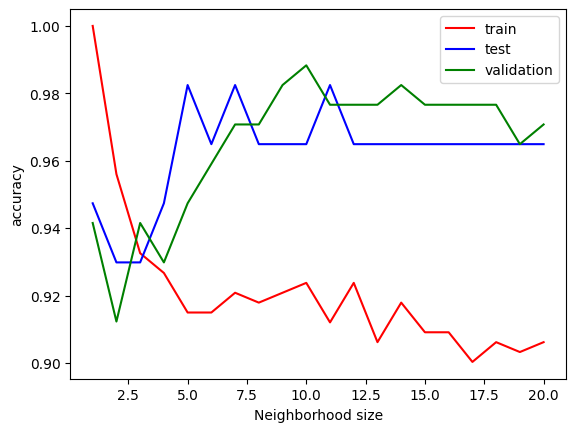

In [335]:
plt.plot(k_num,train_accuracy, color='red',label='train')
plt.plot(k_num,test_accuracy, color='blue',label='test')
plt.plot(k_num,val_accuracy, color='green',label='validation')
plt.xlabel('Neighborhood size')
plt.ylabel('accuracy')

plt.legend()

plt.savefig('picture/ans_2.png')

plt.show()